In [ ]:
library(dslabs)
library(ggplot2)
library(dplyr)
library(corrgram)
library(tidyverse)

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 10)

In [ ]:
help(murders)

In [ ]:
# Structure of data
str(murders)

In [ ]:
dim(murders)
head(murders)

#
Transform

In [ ]:
murders <- murders %>%
  mutate(
    percent_total = format(total / sum(total) * 100, digits = 1)
  )

class(murders$percent_total) <- "numeric"
head(murders)

#
Plot - population x total

In [ ]:
murders %>%
  ggplot(aes(x = population / 10^6, y = total)) +
  geom_point(
    size = 5,
    aes(shape = region, color = region)
  ) +
  geom_smooth(method = "lm") +
  labs(
    title = "Cases of gun homicide per state population",
    x = "Population in millions",
    y = "Total Cases",
    shape = "Region",
    color = "Region"
  ) +
  theme(
    axis.text = element_text(size = 12, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(1, 0.5, 0.5, 0.5), "cm")
  )

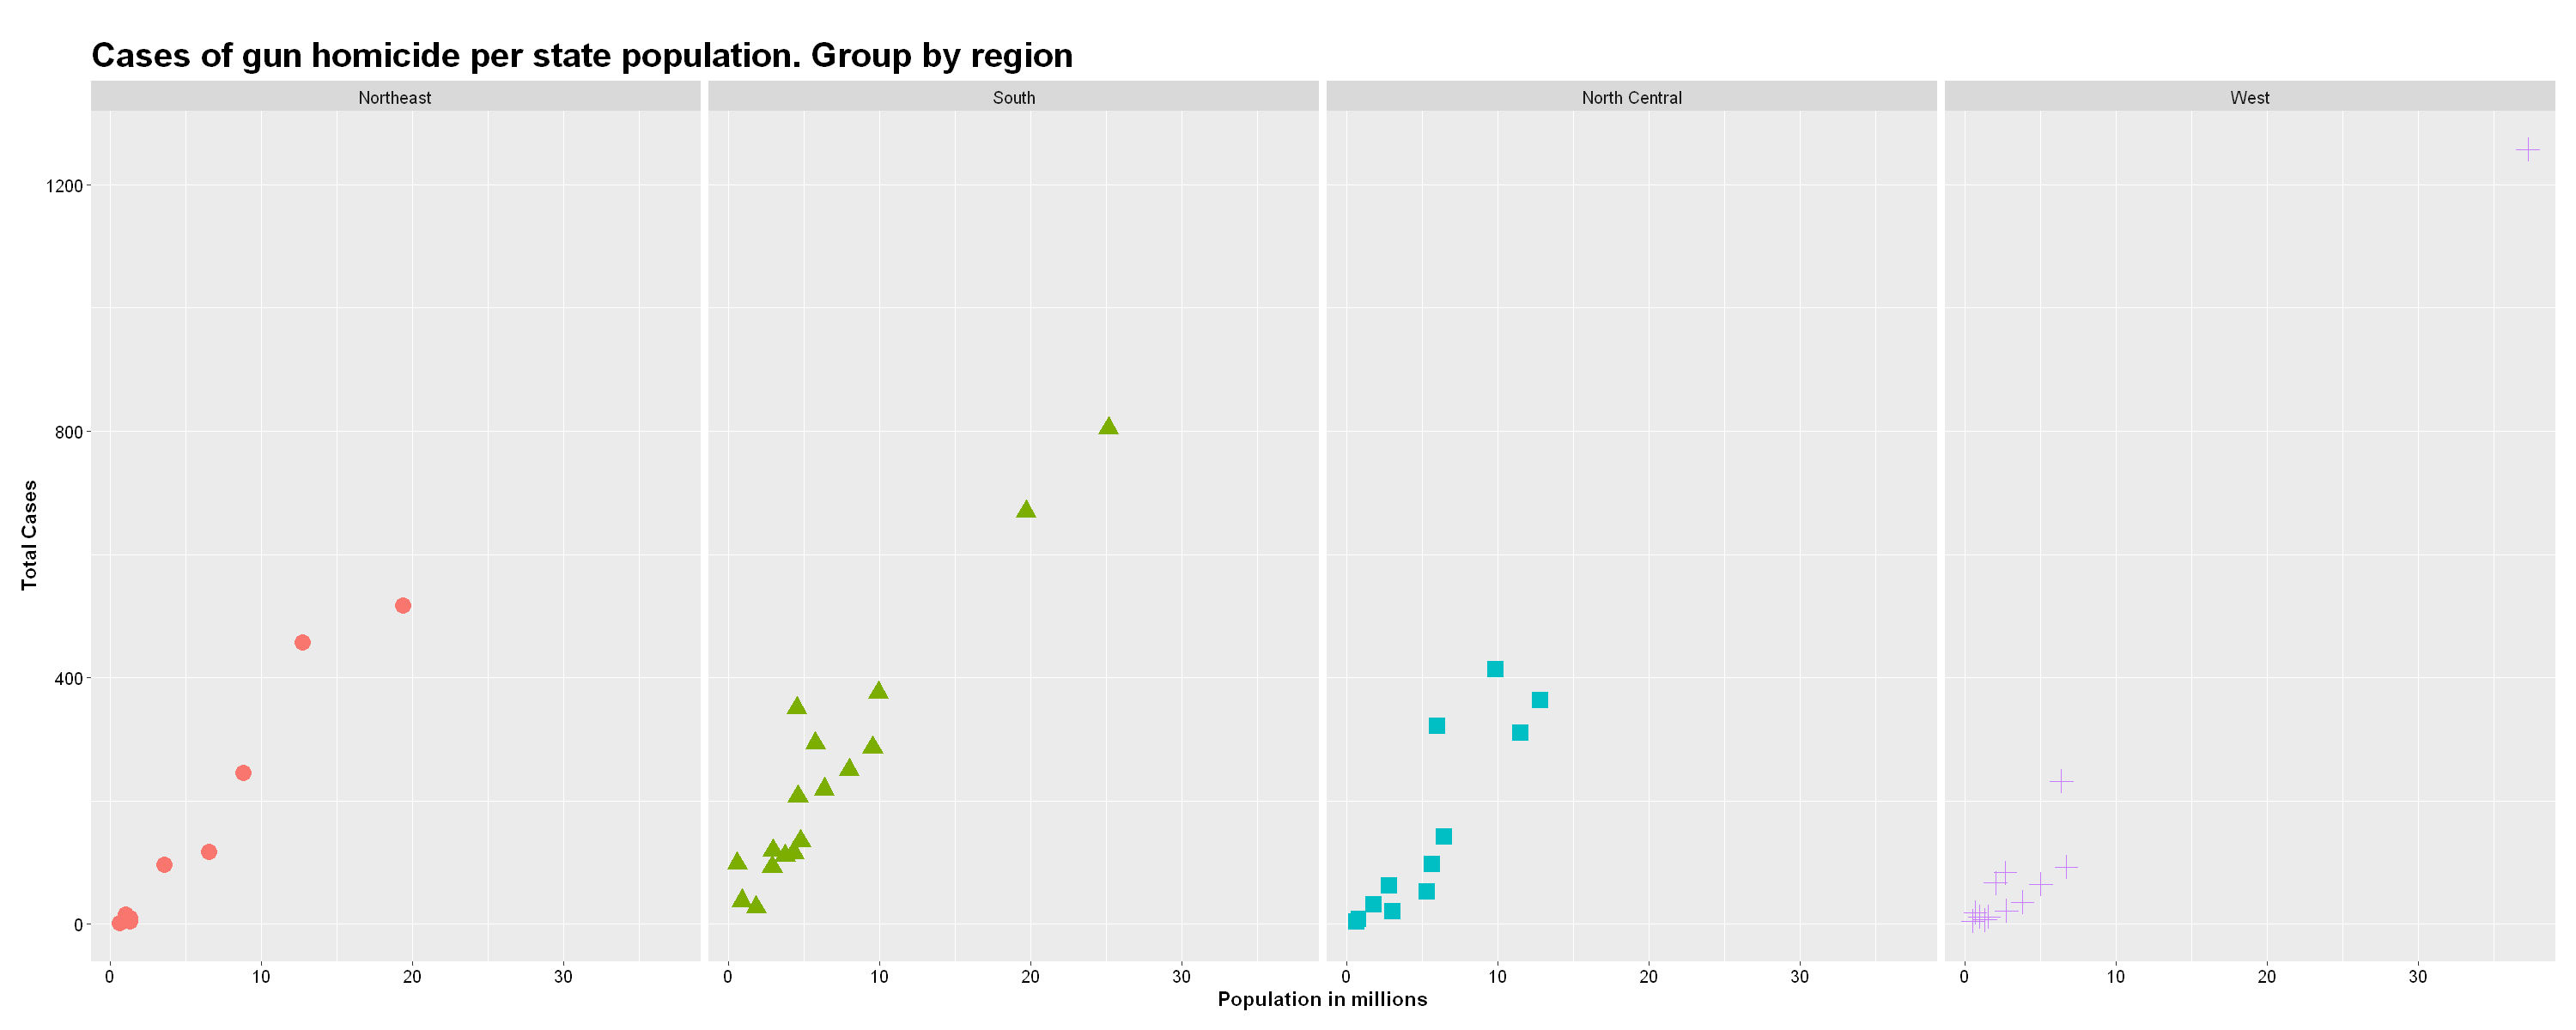

In [5]:
murders %>%
  ggplot(aes(x = population / 10^6, y = total)) +
  geom_point(
    size = 5,
    aes(shape = region, color = region)
  ) +
  facet_grid(. ~ region) +
  labs(
    title = "Cases of gun homicide per state population. Group by region",
    x = "Population in millions",
    y = "Total Cases",
    shape = "Region",
    color = "Region"
  ) +
  theme(
    axis.text = element_text(size = 12, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    plot.margin = unit(c(1, 0.5, 0.5, 0.5), "cm"),
    strip.text = element_text(size = 12),
    legend.position = "none"
  )

In [ ]:
murders %>%
  ggplot(aes(x = total, y = reorder(state, total), fill = total)) +
  geom_col() +
  geom_text(
    aes(label = total),
    hjust = -0.5
  ) +
  labs(
    title = "Top 10 States with the highest cases of gun murder",
    x = "Total",
    fill = "State"
  ) +
  theme(
    axis.text = element_text(size = 14, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    axis.text.x = element_blank()
  )

#
Quidrado

In [ ]:
murders_matrix <- column_to_rownames(murders[, c(1, 4, 5)], "state")
head(murders_matrix)

In [ ]:
# Quidrado
chisq.test(murders_matrix)

#
boxplot region

In [ ]:
murders %>%
  ggplot(aes(x = region, y = total)) +
  geom_boxplot() +
  theme(
    axis.text = element_text(size = 12, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(1, 0.5, 0.5, 0.5), "cm")
  )

#
Anova - total ~ region

In [ ]:
# Pr(>F) > 0.05
# Hipótese nula de que não há diferença significativa
an <- aov(total ~ region, data = murders)
summary(an)

##
Tukey - total ~ region

In [ ]:
tukey <- TukeyHSD(an)
tukey

In [ ]:
plot(tukey)

#
Anova - total ~ region * population

In [ ]:
# Valores abaixo de 0.05
an1 <- aov(total ~ region * population, data = murders)
summary(an1)

#
Top 10 States

In [ ]:
# Top 10 States with most cases)
top10 <- murders %>%
  slice_max(total, n = 10) %>%
  mutate(
    percent_total = format(percent_total, digits = 2)
  )

class(murders$percent_total) <- "numeric"
top10

In [ ]:
top10 %>%
  ggplot(aes(x = total, y = reorder(state, total), fill = total)) +
  geom_col() +
  geom_text(
    aes(label = total),
    hjust = -0.5,
    vjust = -0.6,
    size = 5.5
  ) +
  geom_text(
    aes(label = paste("%", percent_total, sep = "")),
    hjust = -0.2,
    vjust = 1,
    size = 5.5
  ) +
  labs(
    title = "Top 10 States with the highest cases of gun murder",
    x = "Total",
    fill = "State"
  ) +
  theme(
    axis.text = element_text(size = 14, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    panel.background = element_rect(fill = "#f8f2f2")
  )

#
Bottom 10 States

In [ ]:
# bottom 10 States with most cases
bottom10 <- murders %>%
  slice_min(total, n = 10)
bottom10

In [ ]:
# Plot
bottom10 %>%
  ggplot(aes(x = total, y = reorder(state, total), fill = total)) +
  geom_col() +
  geom_text(
    aes(label = total),
    hjust = -1,
    vjust = -0.6,
    size = 5.5
  ) +
  geom_text(
    aes(label = paste("%", format(percent_total, digits = 1), sep = "")),
    hjust = -0.2,
    vjust = 1,
    size = 5.5
  ) +
  labs(
    title = "Top 10 States with the lowest cases of gun murder",
    x = "Total",
    fill = "State"
  ) +
  theme(
    axis.text = element_text(size = 14, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    axis.text.x = element_blank()
  ) +
  scale_fill_viridis_c(option = "mako", direction = -1, begin = 0.2, end = 0.8)

#
By Region

In [ ]:
regions <- aggregate(
  murders$total,
  by = list(Region = murders$region),
  FUN = sum
)
colnames(regions) <- c("Region", "Total")
regions <- regions %>%
  mutate(Percent_total = format(Total / sum(Total) * 100, digits = 3))
class(regions$Percent_total) <- "numeric"
regions

In [ ]:
regions %>%
  ggplot(aes(x = Total, y = reorder(Region, Total), fill = Total)) +
  geom_col() +
  labs(
    title = "Cases of gun murder by Region",
    x = "Total",
    fill = "Region"
  ) +
  geom_text(
    aes(label = Total),
    hjust = -0.5,
    vjust = -1,
    size = 5.5
  ) +
  geom_text(
    aes(label = paste("%", Percent_total, sep = "")),
    hjust = -0.3,
    vjust = 1,
    size = 5.5
  ) +
  theme(
    axis.text = element_text(size = 14, colour = "black"),
    axis.title = element_text(size = 14, face = "bold"),
    title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    panel.background = element_rect(fill = "#f8f2f2")
  )

#
Regressão Linear Simples

In [ ]:
murders_matrix <- column_to_rownames(murders[, c(1, 4, 5)], "state")
head(murders_matrix)

In [ ]:
cor(murders_matrix)

In [ ]:
corrgram(murders_matrix,
  order = TRUE, lower.panel = panel.shade, upper.panel = panel.pie,
  text.panel = panel.txt, main = "Murders"
)

In [ ]:
modelo <- lm(population ~ total, data = murders_matrix)
modelo

In [ ]:
plot(
  population ~ total,
  data = murders_matrix,
  ylab = "Population",
  xlab = "Total",
  main = "Murders"
)
abline(modelo)

In [ ]:
hist(modelo$residuals)

In [ ]:
plot(modelo$fitted.values, murders_matrix$total)